### **Understanding GloVe**

**GloVe Objective**:
GloVe aims to learn word embeddings by leveraging global co-occurrence statistics of words.

**Co-occurrence Matrix**:
GloVe constructs a co-occurrence matrix representing word co-occurrences within a context window.

**Objective Function**:
GloVe minimizes the difference between dot products of word vectors and the logarithm of co-occurrence probabilities.

---

### Preprocessing Text Data

**Tokenization**:
Tokenize the text corpus into words using libraries like NLTK or spaCy.

**Vocabulary Building**:
Build a vocabulary of words from the corpus and assign unique indices to each word.

### Experiment and Evaluation

**Experiment with GloVe Embeddings**:
Utilize GloVe embeddings in various NLP tasks such as word similarity, analogy, text classification, etc.

**Evaluate Performance**:
Assess the performance of GloVe embeddings compared to other techniques or baseline models in your tasks.

---

### Further Learning

- Delve deeper into the mathematics and implementation details of GloVe by reading the original paper and related research.
- Explore advanced topics like subword embeddings, contextual embeddings, and domain-specific embeddings.

In [3]:
import numpy as np
import pandas as pd


# Glove implementation

In [1]:
# prompt: drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
embeddings_index = {}
with open('/content/drive/MyDrive/quora_question_pair_similarity/glove.6B.50d.txt') as f:
  for line in f:
    word, vec = line.split(' ', 1)
    vec = np.fromstring(vec, sep=' ', dtype=np.float32)
    embeddings_index[word] = vec

def vectorize_sequences(sequences, dimension=50):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j, word in enumerate(sequence):
      if word in embeddings_index:
        results[i, :] += embeddings_index[word]
  return results

with open('/content/drive/MyDrive/DL_Architecture/Word_Embedding/preprocessed_tokens.txt') as f:
  sequences = f.readlines()

sequences = [s.strip() for s in sequences]

vectorized_sequences = vectorize_sequences(sequences)


In [11]:
print(vectorized_sequences)


[[ -4670.88731661  56329.51154089  47149.29777598  49060.58073241
   21906.10590104  -1246.80746966  27568.84657802 -51075.98531353
  -18132.00073352  -1142.57477933 -12650.88200936  25341.74833413
  -31664.76147084 -34200.45763806  -5880.63816902  -9482.85735108
  -17940.79021194  -2636.3639851  -20443.93103463 -24569.30365829
  -27077.3214755  -21282.42667736  49398.64160583  31486.26194892
  -13475.1213697  -46252.88893957 -21457.6309625   -4393.57722463
    7471.91327948 -17985.90459746 167778.05345345  -4572.8839104
  -20456.64056398  36440.46423327  10217.20634688 -55178.54963808
   36257.26825883 -30155.1643139   20672.89091759   8510.68544271
   55947.97395799   5981.16070696 -15913.37174264  -2419.76240764
   -6001.07584011  20924.28782943  12832.08660741 -27540.76589619
   23043.30382178  69933.32758754]]


In [12]:
vectorized_sequences.shape

(1, 50)

In [19]:
print("Shape of vectorized_sequences:", vectorized_sequences.shape)


Shape of vectorized_sequences: (1, 50)


### bar plot

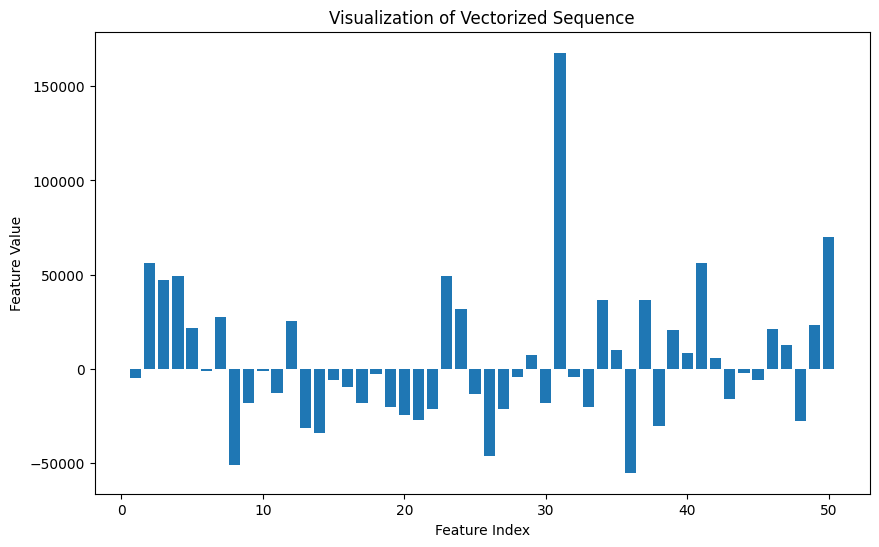

In [20]:
import matplotlib.pyplot as plt

# Generate indices for the features
feature_indices = range(1, 51)  # Assuming 50 features

# Plot the values of the features
plt.figure(figsize=(10, 6))
plt.bar(feature_indices, vectorized_sequences[0])
plt.title('Visualization of Vectorized Sequence')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.show()


### line plot

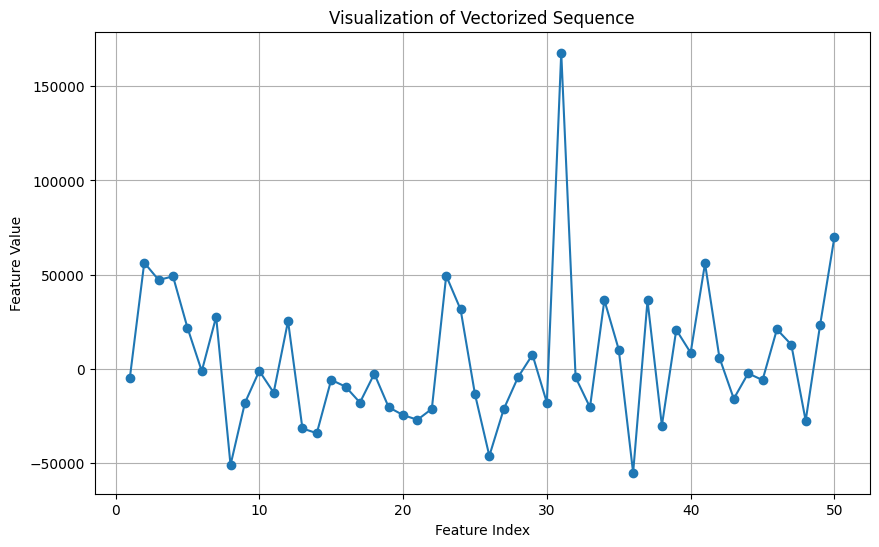

In [21]:
import matplotlib.pyplot as plt

# Generate indices for the features
feature_indices = range(1, 51)  # Assuming 50 features

# Plot the values of the features
plt.figure(figsize=(10, 6))
plt.plot(feature_indices, vectorized_sequences[0], marker='o', linestyle='-')
plt.title('Visualization of Vectorized Sequence')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.grid(True)
plt.show()


### heatmap

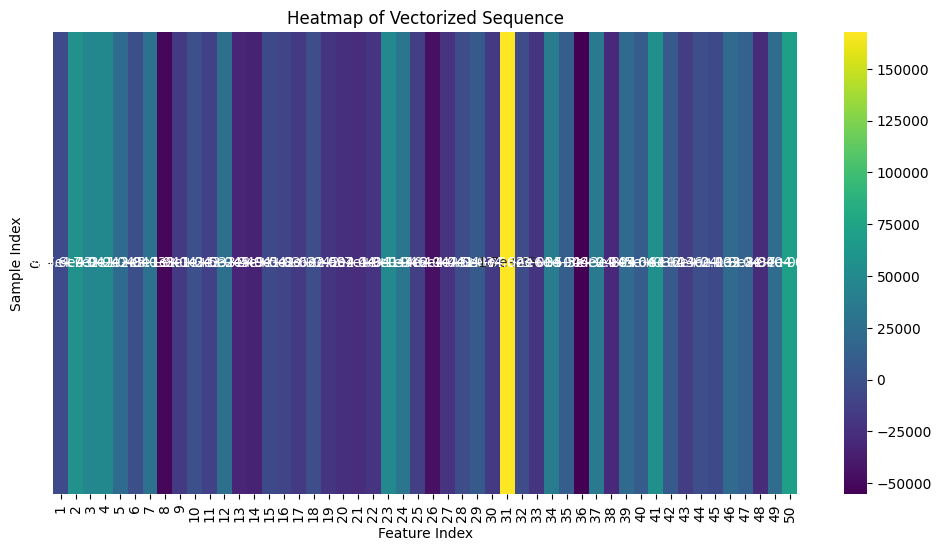

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate indices for the features
feature_indices = range(1, 51)  # Assuming 50 features

# Create a heatmap of the values of the features
plt.figure(figsize=(12, 6))
sns.heatmap(vectorized_sequences, cmap='viridis', annot=True, xticklabels=feature_indices)
plt.title('Heatmap of Vectorized Sequence')
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')
plt.show()


### Distributed Plot

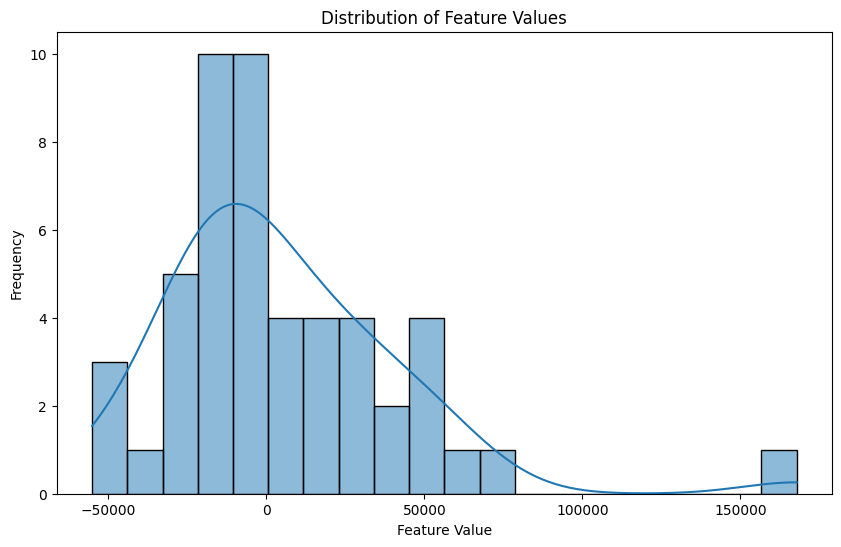

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of feature values
plt.figure(figsize=(10, 6))
sns.histplot(vectorized_sequences[0], bins=20, kde=True)
plt.title('Distribution of Feature Values')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()
